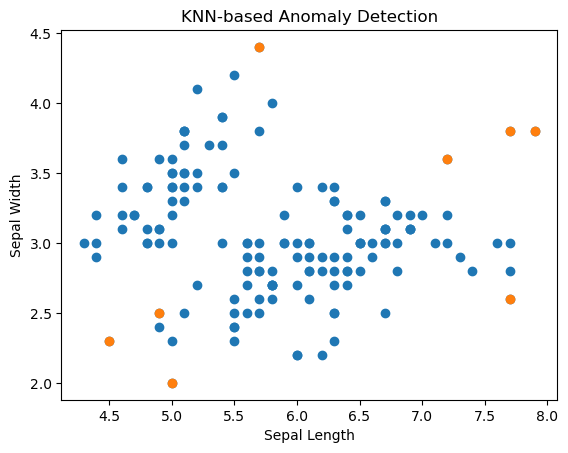

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KNN model
k = 5
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X_scaled)

# Compute distances to k nearest neighbors
distances, _ = knn.kneighbors(X_scaled)

# Anomaly score = mean distance
anomaly_scores = distances.mean(axis=1)

# Threshold (top 5% as anomalies)
threshold = np.percentile(anomaly_scores, 95)
anomalies = anomaly_scores > threshold

# Plot (using first two features for visualization)
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[anomalies, 0], X[anomalies, 1])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("KNN-based Anomaly Detection")
plt.show()

